<a href="https://colab.research.google.com/github/Francisroyce/Francisroyce/blob/main/fake_news_detection_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
# from google.colab import drive
# drive.mount('/content/drive')

**Project Title: Fake News Detection**

**Project Overview:**
The Fake News Detection project aims to develop a machine learning model capable of distinguishing between genuine news articles and fake news articles. With the proliferation of digital media and the ease of sharing information, the spread of misinformation and fake news has become a significant concern. This project aims to contribute to the fight against misinformation by automating the process of identifying fake news using advanced natural language processing and machine learning techniques.

**Project Steps:**

1. **Data Collection:** Gather a diverse and comprehensive dataset consisting of labeled news articles, including both genuine and fake examples. This dataset will serve as the foundation for training and evaluating the model.

2. **Data Preprocessing:** Clean and preprocess the text data by removing irrelevant information, special characters, and formatting inconsistencies. Perform tokenization, stemming, and other text normalization techniques to prepare the data for model training.

3. **Feature Extraction:** Convert the preprocessed text into numerical features that can be fed into machine learning algorithms. Common techniques include TF-IDF (Term Frequency-Inverse Document Frequency) and word embeddings like Word2Vec or GloVe.

4. **Model Selection:** Experiment with various machine learning algorithms such as Support Vector Machines (SVM), Random Forests, and neural networks like Convolutional Neural Networks (CNN) or Recurrent Neural Networks (RNN). Select the best-performing algorithm based on evaluation metrics.

5. **Model Training:** Divide the dataset into training, validation, and testing sets. Train the selected model on the training data and fine-tune its parameters using the validation set. This step involves optimizing the model's ability to differentiate between genuine and fake news.

6. **Model Evaluation:** Assess the trained model's performance using appropriate evaluation metrics such as accuracy, precision, recall, F1-score, and AUC-ROC curve. Make adjustments and iterate on the model if necessary to achieve desired performance.

7. **Deployment:** Once a satisfactory model is achieved, deploy it to a user-friendly interface. This could be a web application, browser extension, or API that allows users to input news articles and receive a prediction about their authenticity.

8. **Continuous Improvement:** Regularly update and retrain the model with new data to adapt to evolving trends in fake news. Implement feedback mechanisms to gather user input and improve the model's accuracy over time.

**Project Goals:**

1. Develop a reliable and accurate fake news detection model.
2. Provide users with a tool to verify the credibility of news articles they encounter online.
3. Contribute to the efforts in reducing the spread of misinformation and fake news.
4. Raise awareness about the importance of critical media consumption and fact-checking.

**Potential Challenges:**

1. **Data Quality:** Ensuring the dataset is representative and balanced to prevent bias.
2. **Feature Engineering:** Selecting and extracting relevant features from the text data.
3. **Model Complexity:** Balancing model complexity with computational resources and deployment constraints.
4. **Adversarial Attacks:** Mitigating potential attempts to manipulate the model by generating sophisticated fake news.

By successfully implementing this project, we can create a valuable tool to combat the spread of fake news and promote more informed and responsible media consumption.

# Importing dependencies

In [53]:
pip install contractions


In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10]

import seaborn as sns
sns.set_theme(style="darkgrid")

from wordcloud import WordCloud

import contractions
import string
import re

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Embedding, Flatten

import warnings
warnings.filterwarnings('ignore')


In [55]:
train_data = pd.read_csv('/content/drive/MyDrive/fake_news/train.csv', header = 0)
test_data = pd.read_csv('/content/drive/MyDrive/fake_news/test.csv', header= 0)

In [56]:
train_data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [57]:
test_data.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# Checking missing values

In [58]:
train_data.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [59]:
test_data.isna().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [60]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [61]:
train_data['title'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 20800 entries, 0 to 20799
Series name: title
Non-Null Count  Dtype 
--------------  ----- 
20242 non-null  object
dtypes: object(1)
memory usage: 162.6+ KB


# Fill the Missing values

In [62]:
train_df = train_data.fillna(' ')
test_df = test_data.fillna(' ')

In [63]:
train_df.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [64]:
test_df.isna().sum()

id        0
title     0
author    0
text      0
dtype: int64

# Joining the important columns to use in the project

In [65]:
train_df.columns

Index(['id', 'title', 'author', 'text', 'label'], dtype='object')

In [66]:
test_df.columns

Index(['id', 'title', 'author', 'text'], dtype='object')

In [67]:
train_df['all_info'] = train_df['author'] + train_df['title'] + train_df['text']
test_df['all_info'] = test_df['author'] + test_df['title'] + test_df['text']

In [68]:
train_df.head()

,id,title,author,text,label,all_info
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell LucusHouse Dem Aide: We Didn’t Even Se...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. FlynnFLYNN: Hillary Clinton, Big Wom..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.comWhy the Truth Might Get You ...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss15 Civilians Killed In Single U...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard PortnoyIranian woman jailed for fiction...


In [69]:
test_df.head()

,id,title,author,text,all_info
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning...",David StreitfeldSpecter of Trump Loosens Tongu...
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...,Russian warships ready to strike terrorists n...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...,Common Dreams#NoDAPL: Native American Leaders ...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different...",Daniel VictorTim Tebow Will Attempt Another Co...
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...,Truth Broadcast NetworkKeiser Report: Meme War...


# Tokenize and prepare text data

Tokenization is a fundamental preprocessing step in natural language processing (NLP) that involves breaking down a text into smaller units called tokens. These tokens can be words, subwords, or even characters, depending on the specific tokenization strategy used. The purpose of tokenization is to convert human-readable text into a format that can be easily processed by computers and used for various NLP tasks. Here's why tokenization is important and what it achieves:

1. **Text Segmentation**: Tokenization divides a continuous stream of text into discrete units, making it easier to handle and analyze. In English, tokens are often words, so tokenization separates sentences into individual words.

2. **Vocabulary Creation**: Tokenization builds a vocabulary or dictionary of unique tokens in the text. This vocabulary can be used to map tokens to numerical indices, allowing text data to be represented numerically for machine learning algorithms.

3. **Dimensionality Reduction**: By representing words as tokens, tokenization reduces the dimensionality of the text data. This is important for efficient storage and processing of large text corpora.

4. **Feature Extraction**: Tokenization is a crucial step in extracting features from text data that can be used as input for various NLP tasks, such as sentiment analysis, machine translation, text generation, and more.

5. **Text Normalization**: Tokenization often includes text normalization, which involves converting text to lowercase, removing punctuation, handling contractions, and other steps to standardize the text.

6. **Out-of-Vocabulary Handling**: Tokenization can also handle out-of-vocabulary words (words not in the pre-defined vocabulary) by assigning a special token (like "<OOV>") to represent them.

7. **Efficient Processing**: Once tokenized, text data can be efficiently processed using numerical operations, and it can be easily fed into machine learning models.

For example, consider the sentence: "ChatGPT is an AI language model." After tokenization, this sentence might be represented as the sequence of tokens: ["ChatGPT", "is", "an", "AI", "language", "model", "."].

Tokenization is a foundational step in many NLP tasks and is a prerequisite for tasks such as text classification, named entity recognition, part-of-speech tagging, and more. Different NLP libraries and tools provide various tokenization techniques to suit different needs and languages.

In [70]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(oov_token='<OOV>', num_words=6000)
tokenizer.fit_on_texts(train_df['all_info'])


In [71]:
tokenizer



1. `tokenizer = Tokenizer(oov_token="<OOV>", num_words=6000)`: This line of code initializes a `Tokenizer` object. The `Tokenizer` is a utility class provided by the Keras library (part of TensorFlow) that is commonly used to preprocess and tokenize text data for machine learning tasks. Here's what each argument means:

   - `oov_token="<OOV>"`: This argument specifies the out-of-vocabulary token to be used when the tokenizer encounters words that are not in its vocabulary. In this case, "<OOV>" is used to represent words that are not recognized by the tokenizer.
   
   - `num_words=6000`: This argument specifies the maximum number of words to be kept in the vocabulary. Only the most frequent `num_words` words will be retained, and any words beyond this limit will be ignored. This can help in reducing the dimensionality of the data and speed up training.

2. `tokenizer.fit_on_texts(train_df['all_info'])`: This line of code fits (or trains) the tokenizer on the text data provided in the 'all_info' column of the 'train_df' DataFrame. It means the tokenizer analyzes the text data, updates its internal vocabulary based on the frequency of words, and prepares itself for tokenizing future text sequences. The 'fit_on_texts' method is a common step in text preprocessing pipelines before using the tokenizer to convert text into sequences of tokens.

In summary, this code initializes a tokenizer with a predefined vocabulary size of 6000 words and an out-of-vocabulary token "<OOV>". It then trains the tokenizer on the text data from the 'all_info' column of the 'train_df' DataFrame, updating its vocabulary based on the word frequencies in the provided text. This prepared tokenizer can later be used to convert sentences or documents into sequences of tokens for further processing, such as training machine learning models.

In [72]:
target = train_df['label'].values

In [73]:
target

array([1, 0, 1, ..., 0, 1, 1])

0 = real news

1 = fake news

In [74]:
max_length = 40
vocab_size = 6000

# converting the texts to numbers
sequences_train = tokenizer.texts_to_sequences(train_df['all_info'])
sequences_test = tokenizer.texts_to_sequences(test_df['all_info'])

padded_train = pad_sequences(sequences_train, padding = 'post', maxlen=max_length)
padded_test = pad_sequences(sequences_test, padding = 'post', maxlen=max_length)

This code prepares text data for a machine learning model by performing the following steps:

1. It sets the maximum length of sequences (`max_length`) to 40 and the vocabulary size (`vocab_size`) to 6000.

2. It uses a `tokenizer` to convert text data from the 'all_info' column of a training dataframe (`train_df`) and a test dataframe (`test_df`) into sequences of integers (`sequences_train` and `sequences_test`, respectively).

3. The sequences are then padded with zeros to ensure that they all have the same length of 40, using the `pad_sequences` function. Padding is added to the end of each sequence (`padding='post'`). This prepares the data for input to a machine learning model where inputs need to have a consistent shape.

In summary, this code processes text data, tokenizes it into integer sequences, and ensures all sequences have the same length for further use in a machine learning model, often in tasks like natural language processing or sequence prediction.

In [76]:
x_train, x_test, y_train, y_test = train_test_split(padded_train, target, test_size=0.2)

In [80]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((16640, 40), (4160, 40), (16640,), (4160,))

In [82]:
x_train

array([[ 257,    7,    2, ..., 1123,    1,  292],
       [   5,    1, 2069, ...,    2,  338,  238],
       [ 279,  653, 1133, ...,  467,    1, 1052],
       ...,
       [   7, 1129,    4, ...,    2, 1521,  461],
       [   7, 2772,   21, ...,    1,    7,  510],
       [  67,   23,    1, ...,   43,   20,  243]], dtype=int32)

In [83]:
x_test

array([[  77,   64,    2, ..., 5976,  399,    1],
       [   8,   33, 1699, ...,    1, 3121,  611],
       [  56,   35,   46, ..., 3833,    2, 1808],
       ...,
       [   1,  362,   72, ...,   89,  482,  415],
       [   1,    9,    6, ...,  125,  362, 2889],
       [   2,    1,    1, ...,   25, 3253,  172]], dtype=int32)

In [84]:
y_train

array([1, 0, 1, ..., 0, 0, 1])

In [85]:
y_test

array([1, 1, 0, ..., 0, 0, 0])

# Binary classification model

In [86]:
best_model_file_name = "models/best_model_simple.hdf5"

In [87]:
def get_simple_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 10, input_length=max_length))
    model.add(Flatten())
    model.add(Dense(1, activation='sigmoid'))
    return model

This code defines a simple neural network model for text classification using the Keras library. The model is designed to take in sequences of words (text data) and predict a binary outcome (such as classifying whether a given text belongs to a certain category or not). Let's break down the code step by step:

1. Import Required Libraries:
   The code assumes that you have already imported the necessary libraries, including `Sequential`, `Embedding`, `Flatten`, and `Dense` from the Keras library.

2. Define the Model:
   ```python
   model = Sequential()
   ```
   The `Sequential` class in Keras is used to define a linear stack of layers for building neural network models.

3. Add an Embedding Layer:
   ```python
   model.add(Embedding(vocab_size, 10, input_length=max_length))
   ```
   The `Embedding` layer is used to convert integer-encoded vocabulary indices into dense vectors of fixed size (in this case, 10). It's often used for word embedding in natural language processing tasks. The `vocab_size` parameter represents the size of the vocabulary (the total number of unique words in your text data), while `input_length` is the length of each input sequence (number of words in a sentence). This layer essentially learns to represent words in a lower-dimensional space where similar words are closer together.

4. Add a Flatten Layer:
   ```python
   model.add(Flatten())
   ```
   The `Flatten` layer is used to flatten the output from the previous layer into a 1D vector. This step is necessary because the subsequent layer, which is a fully connected `Dense` layer, requires a 1D input.

5. Add a Dense Layer:
   ```python
   model.add(Dense(1, activation='sigmoid'))
   ```
   The `Dense` layer is a fully connected neural network layer. In this case, it has a single output unit with a sigmoid activation function. The sigmoid activation function squashes the output values between 0 and 1, making it suitable for binary classification tasks. The model learns to map the flattened input vectors to a single output value that represents the predicted probability of the input belonging to the positive class.

6. Return the Model:
   ```python
   return model
   ```
   The function returns the defined Keras model, which can then be compiled, trained, and evaluated using appropriate data.

Overall, this code defines a simple neural network architecture for text classification, where words are embedded into a lower-dimensional space, flattened, and then passed through a single dense layer to make binary predictions. Keep in mind that the effectiveness of this model will depend on the specifics of your dataset and the complexity of the classification task.

In [88]:
callbacks=[
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=15,
                                  verbose=1, mode="min", restore_best_weights=True),
    keras.callbacks.ModelCheckpoint(filepath=best_model_file_name, verbose=1, save_best_only=True)
]

This code snippet is configuring callback functions for training a neural network using the Keras library. Callbacks are functions that you can specify to be executed at various points during the training process. They provide a way to monitor and control the training process, allowing you to perform actions such as early stopping, saving the best model, and more.

Let's break down the provided callbacks:

1. `keras.callbacks.EarlyStopping`:
   This callback is used for early stopping, which means the training process will stop if a certain condition is met. The parameters used in this callback are:
   - `monitor`: The metric to monitor for early stopping. In this case, it's `"val_loss"` which means the validation loss is being monitored.
   - `patience`: The number of epochs with no improvement after which training will be stopped. In this case, if the validation loss does not improve for 15 consecutive epochs, training will stop.
   - `verbose`: Verbosity mode. When set to 1, it prints messages about the early stopping process.
   - `mode`: The direction of improvement to monitor. `"min"` means the monitored metric should be minimized (e.g., validation loss should decrease).
   - `restore_best_weights`: If set to `True`, the model's weights will be restored to the best weights found during training when the training is stopped due to early stopping.

2. `keras.callbacks.ModelCheckpoint`:
   This callback is used to save the model's weights during training, so you can later restore the best performing model. The parameters used in this callback are:
   - `filepath`: The file path where the model weights will be saved. The variable `best_model_file_name` likely contains the desired file path.
   - `verbose`: Similar to the verbose parameter in `EarlyStopping`, when set to 1, it prints messages about saving the model.
   - `save_best_only`: If set to `True`, the callback will only save the model weights if the monitored metric (e.g., validation loss) has improved since the last checkpoint.

Combining these two callbacks, the code sets up the following behavior during training:

- The `EarlyStopping` callback will monitor the validation loss. If the validation loss doesn't improve for 15 consecutive epochs, the training process will stop, and the model's weights will be restored to the best performing weights.
- The `ModelCheckpoint` callback will save the model's weights to the specified file path whenever a new best performing model is found based on the validation loss.

This combination of callbacks helps to prevent overfitting by stopping training early if the model's performance on the validation set is not improving, and it also saves the best model weights for later use.

In [89]:
model = get_simple_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 10)            60000     
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 1)                 401       
                                                                 
Total params: 60,401
Trainable params: 60,401
Non-trainable params: 0
_________________________________________________________________


In [90]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])



Let's break down the provided code line by line:

1. `model.compile`: This is a method in Keras used to configure the training process of a neural network model.

2. `loss='binary_crossentropy'`: This specifies the loss function that will be used to measure the difference between the predicted output and the actual target output during training. In this case, the loss function is `'binary_crossentropy'`, which is commonly used for binary classification tasks, where the model is trying to classify inputs into two classes (e.g., 0 or 1, true or false, positive or negative).

3. `optimizer='adam'`: This specifies the optimization algorithm that will be used to update the model's weights based on the computed loss. `'adam'` refers to the Adam optimizer, which is an adaptive optimization algorithm that adjusts the learning rate during training to improve convergence.

4. `metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]`: These are the evaluation metrics that will be computed during training to monitor the model's performance. The list contains two metrics:

   - `tf.keras.metrics.Precision()`: This metric calculates the precision of the model's predictions. Precision measures the proportion of correctly predicted positive instances (true positives) out of all instances predicted as positive (true positives + false positives).

   - `tf.keras.metrics.Recall()`: Also known as sensitivity or true positive rate, recall calculates the proportion of correctly predicted positive instances (true positives) out of all actual positive instances (true positives + false negatives).

By specifying these metrics in the `compile` method, the model will compute and display the precision and recall values during training, allowing you to monitor how well the model is performing in terms of correctly classifying positive instances and minimizing false positives and false negatives.

Here's a summary of what the provided code does: It configures the compilation of a neural network model for binary classification using the binary cross-entropy loss function, the Adam optimizer for training, and monitors the model's precision and recall metrics during training.

In [91]:
%%time
history = model.fit(x_train,
                    y_train,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    callbacks=callbacks)

Epoch 1/20
506/520 [============================>.] - ETA: 0s - loss: 0.4806 - precision: 0.7785 - recall: 0.8365
Epoch 1: val_loss improved from inf to 0.31220, saving model to models/best_model_simple.hdf5
520/520 [==============================] - 29s 44ms/step - loss: 0.4759 - precision: 0.7802 - recall: 0.8371 - val_loss: 0.3122 - val_precision: 0.8637 - val_recall: 0.8774
Epoch 2/20
516/520 [============================>.] - ETA: 0s - loss: 0.2446 - precision: 0.8977 - recall: 0.9149
Epoch 2: val_loss improved from 0.31220 to 0.25083, saving model to models/best_model_simple.hdf5
520/520 [==============================] - 4s 7ms/step - loss: 0.2442 - precision: 0.8979 - recall: 0.9152 - val_loss: 0.2508 - val_precision: 0.9106 - val_recall: 0.8784
Epoch 3/20
515/520 [============================>.] - ETA: 0s - loss: 0.1735 - precision: 0.9365 - recall: 0.9392
Epoch 3: val_loss improved from 0.25083 to 0.23118, saving model to models/best_model_simple.hdf5
520/520 [===============

In [92]:
range(1, max(history.epoch) + 2)

range(1, 20)

In [93]:
history.history.keys()


dict_keys(['loss', 'precision', 'recall', 'val_loss', 'val_precision', 'val_recall'])

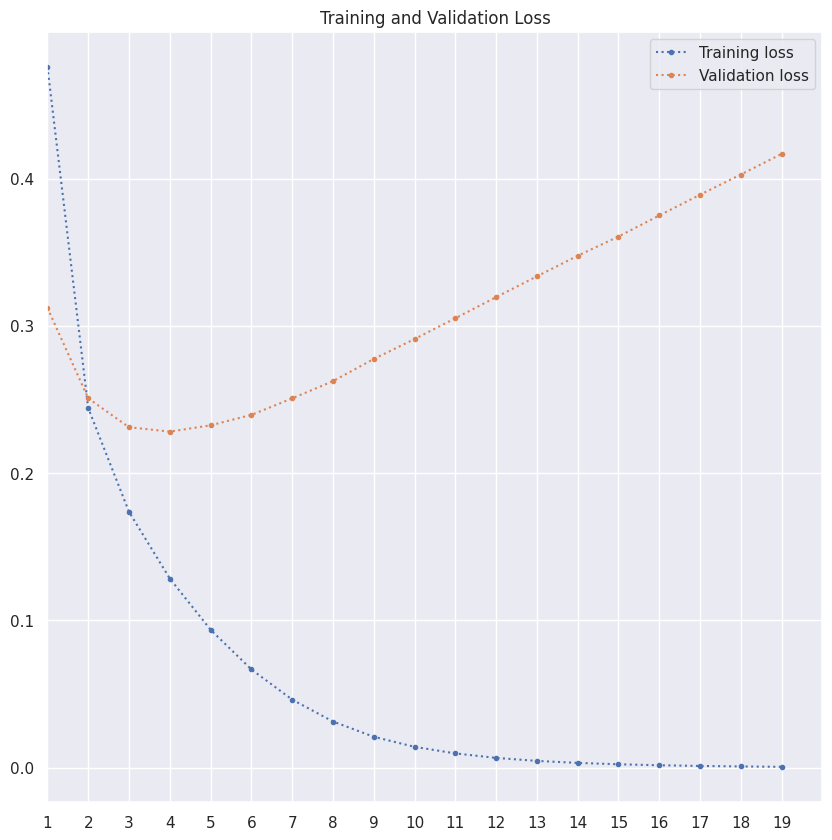

In [94]:
metric_to_plot = "loss"
plt.plot(range(1, max(history.epoch) + 2), history.history[metric_to_plot], ".:", label="Training loss")
plt.plot(range(1, max(history.epoch) + 2), history.history["val_" + metric_to_plot], ".:", label="Validation loss")
plt.title('Training and Validation Loss')
plt.xlim([1,max(history.epoch) + 2])
plt.xticks(range(1, max(history.epoch) + 2))
plt.legend()
plt.show()

In summary, this code generates a line plot that shows the training and validation loss values over different epochs. The x-axis represents the epoch numbers, and the y-axis represents the loss values. The plot includes both training and validation loss curves, and a legend indicates which line corresponds to each. This visualization helps in understanding the convergence and performance of a training process.

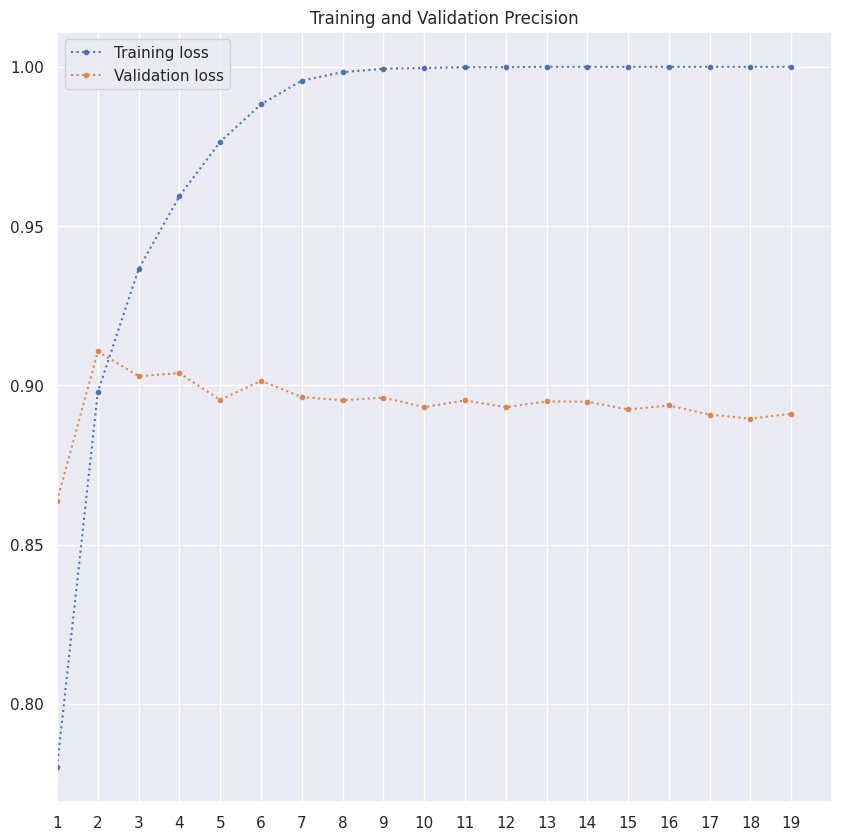

In [95]:
metric_to_plot = "precision"
plt.plot(range(1, max(history.epoch) + 2), history.history[metric_to_plot], ".:", label="Training loss")
plt.plot(range(1, max(history.epoch) + 2), history.history["val_" + metric_to_plot], ".:", label="Validation loss")
plt.title('Training and Validation Precision')
plt.xlim([1,max(history.epoch) + 2])
plt.xticks(range(1, max(history.epoch) + 2))
plt.legend()
plt.show()

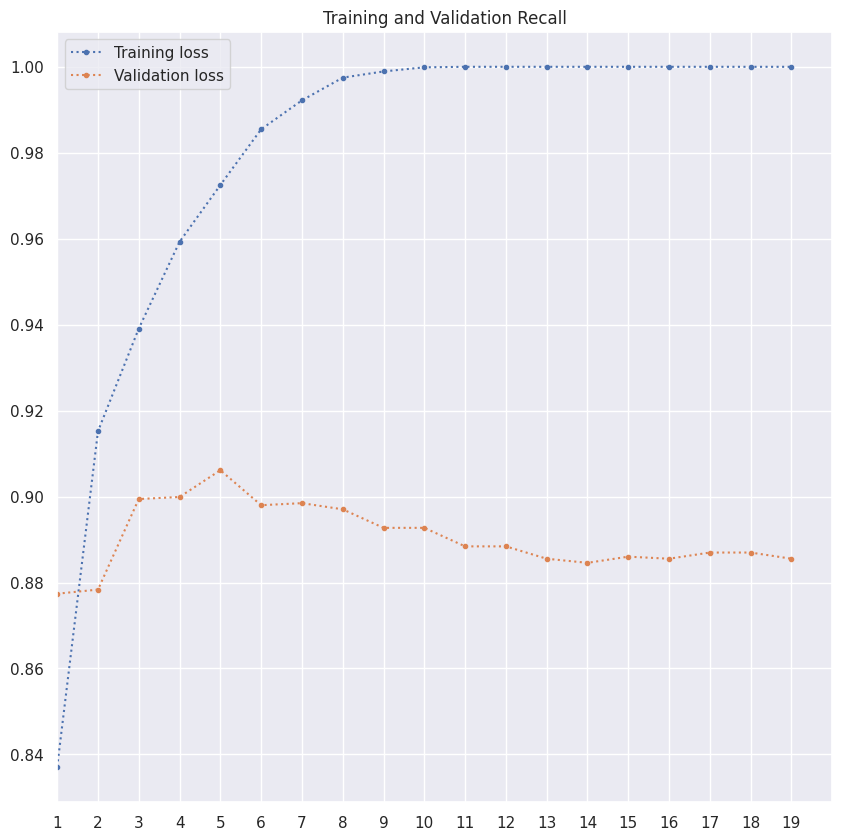

In [96]:
metric_to_plot = "recall"
plt.plot(range(1, max(history.epoch) + 2), history.history[metric_to_plot], ".:", label="Training loss")
plt.plot(range(1, max(history.epoch) + 2), history.history["val_" + metric_to_plot], ".:", label="Validation loss")
plt.title('Training and Validation Recall')
plt.xlim([1,max(history.epoch) + 2])
plt.xticks(range(1, max(history.epoch) + 2))
plt.legend()
plt.show()

In [97]:
model = keras.models.load_model(best_model_file_name)
y_pred = (model.predict(x_test) > 0.5).astype("int32")
print('Accuracy: ', accuracy_score(y_test, y_pred))
print('Precision: ', precision_score(y_test, y_pred))
print('Recall: ', recall_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

130/130 [==============================] - 0s 3ms/step
Accuracy:  0.9016826923076923
Precision:  0.9037999037999038
Recall:  0.899904214559387
F1 Score:  0.9018478521718262


In [98]:
y_pred

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

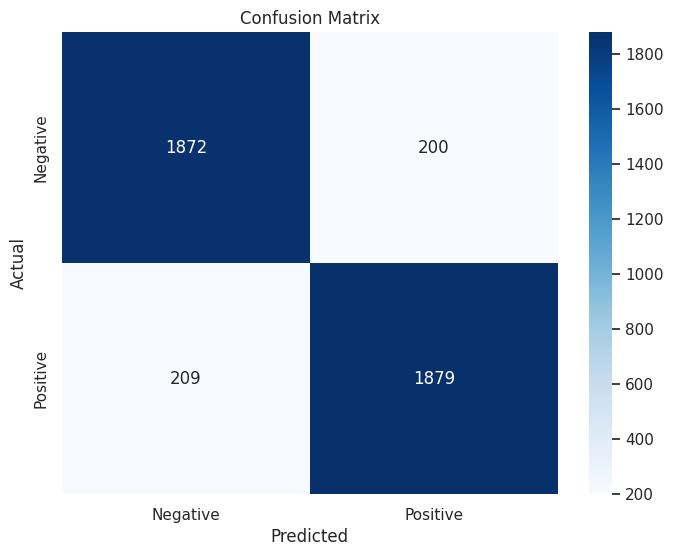

In [100]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Using LSTM Model for Text Classification